In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [5]:
data=pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

## Decision tree

In [7]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=4,
                             min_weight_fraction_leaf=0.01,
                             splitter="best", 
                             random_state=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.71875


[Text(0.45689655172413796, 0.9, 'x[1] <= 127.5\nentropy = 0.92\nsamples = 576\nvalue = [383, 193]'),
 Text(0.1896551724137931, 0.7, 'x[1] <= 99.5\nentropy = 0.704\nsamples = 382\nvalue = [309, 73]'),
 Text(0.06896551724137931, 0.5, 'x[5] <= 30.7\nentropy = 0.318\nsamples = 156\nvalue = [147, 9]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.10344827586206896, 0.3, 'x[5] <= 37.35\nentropy = 0.548\nsamples = 71\nvalue = [62, 9]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.337\nsamples = 48\nvalue = [45, 3]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.828\nsamples = 23\nvalue = [17, 6]'),
 Text(0.3103448275862069, 0.5, 'x[7] <= 28.5\nentropy = 0.86\nsamples = 226\nvalue = [162, 64]'),
 Text(0.2413793103448276, 0.3, 'x[5] <= 31.2\nentropy = 0.552\nsamples = 117\nvalue = [102, 15]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.216\nsamples = 58\nvalue = [56, 2]'),
 Text(0.27586206896551724, 0.1, 'entropy = 0.761\nsamples = 59\nvalue = [46

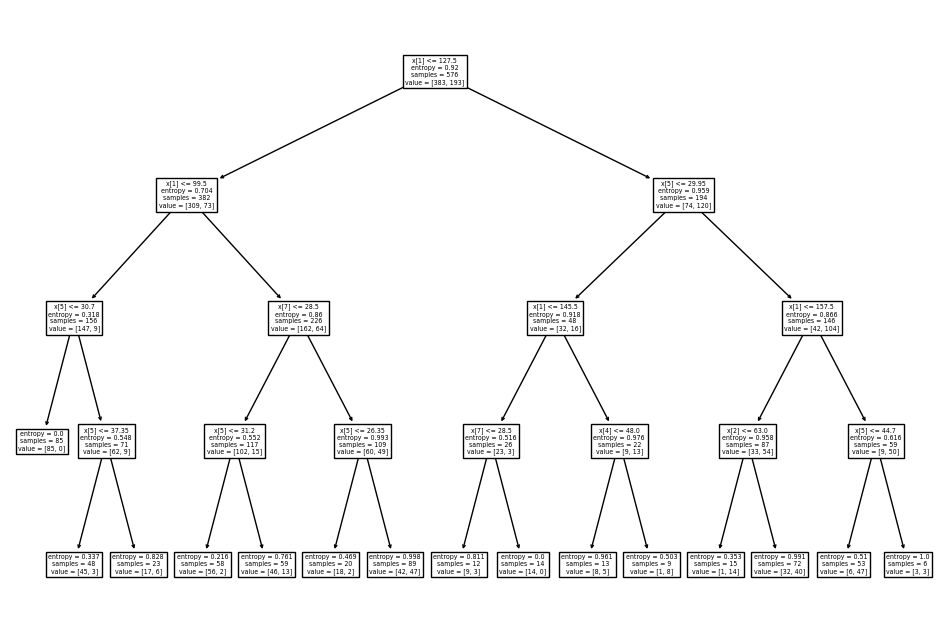

In [8]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

In [198]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.483553
 2) BMI                            0.221471
 3) Age                            0.214403
 4) Pregnancies                    0.062584
 5) SkinThickness                  0.017988
 6) DiabetesPedigreeFunction       0.000000
 7) Insulin                        0.000000
 8) BloodPressure                  0.000000


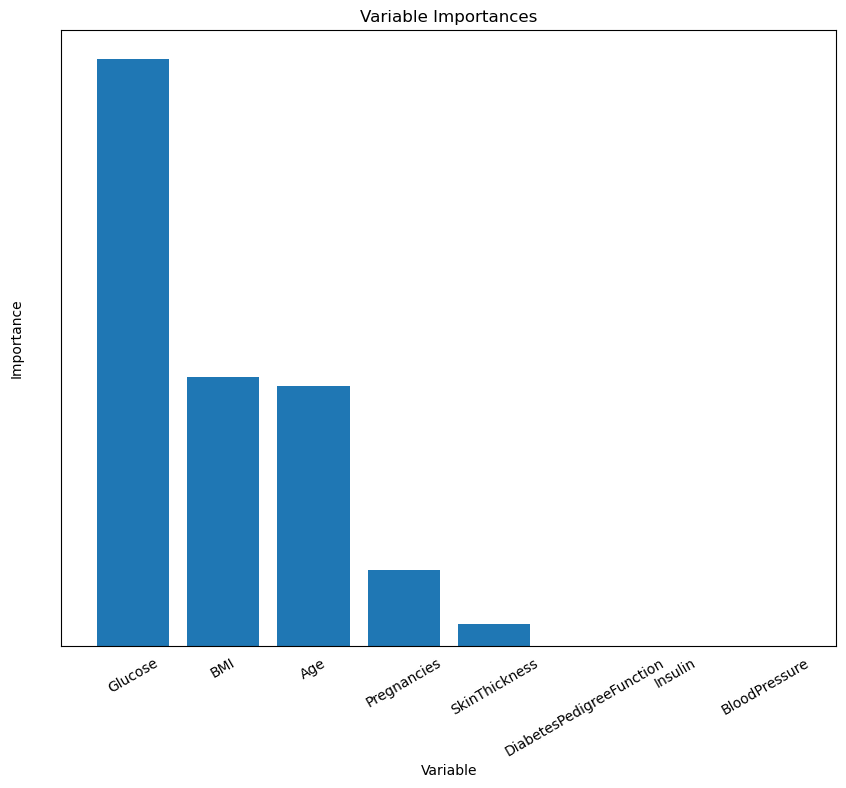

In [199]:
importances.sort()
plt.figure(figsize=(10, 8))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances[::-1], orientation = 'vertical')
plt.xticks(x_values, feat_labels[sorted_indices],rotation=30,c='black')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [203]:
dt_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
print('AUC',dt_roc_auc)
print(classification_report(y_test, clf.predict(x_test)))

AUC 0.7201138519924098
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       124
           1       0.66      0.62      0.64        68

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



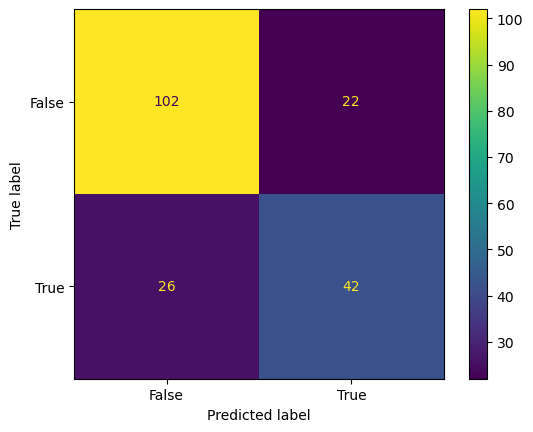

In [204]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

## Random Forest

In [239]:
rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy',
                            max_depth=None,
                            min_samples_split=10,
                            min_weight_fraction_leaf=0.02)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.78125


In [240]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.383316
 2) BMI                            0.159925
 3) Age                            0.159174
 4) DiabetesPedigreeFunction       0.096211
 5) Pregnancies                    0.067870
 6) BloodPressure                  0.050418
 7) SkinThickness                  0.046632
 8) Insulin                        0.036455


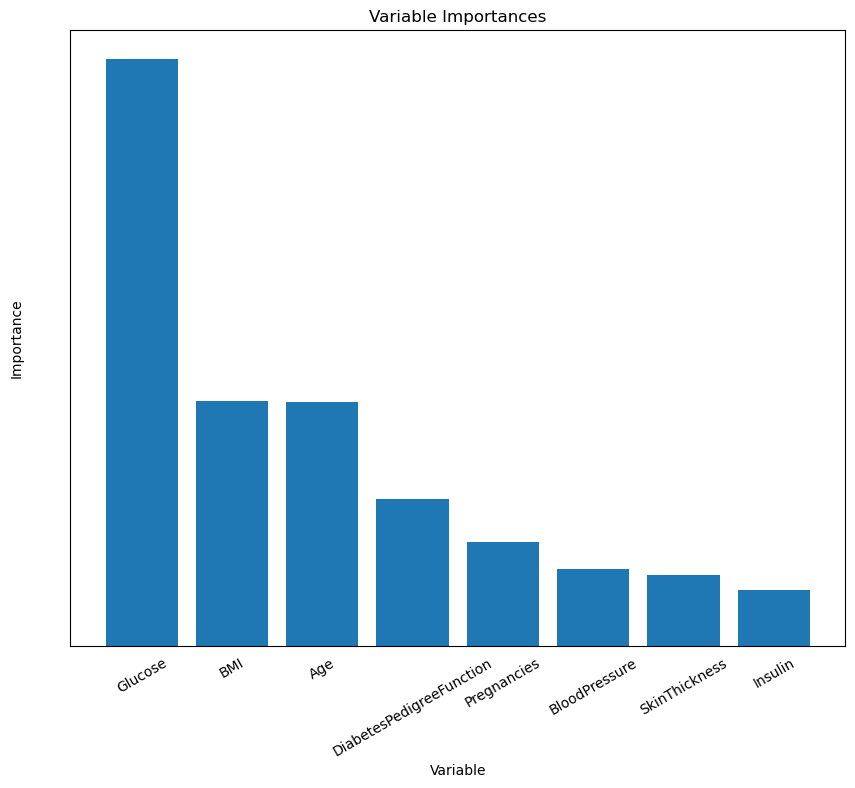

In [241]:
importances.sort()
plt.figure(figsize=(10, 8))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances[::-1], orientation = 'vertical')
plt.xticks(x_values, feat_labels[sorted_indices],rotation=30,c='black')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [242]:
dt_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
print('AUC',dt_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))

AUC 0.7409867172675523
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



## XG Boost

In [52]:
xgb_model = XGBClassifier(
                          booster='gbtree',
                          n_estimators=10, 
                          max_depth=5, 
                          #gamma=0.1,
                          #min_child_weight=3,
                          #scale_pos_weight=1.9,
                          eta=0.1)
xgb_model.fit(x_train,y_train) 
prediction=xgb_model.predict(x_test) 
print('XGboost accuracy:',accuracy_score(prediction,y_test))

XGboost accuracy: 0.7447916666666666


In [53]:
importances = xgb_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.365602
 2) Age                            0.136733
 3) BMI                            0.109307
 4) Pregnancies                    0.096626
 5) DiabetesPedigreeFunction       0.085787
 6) BloodPressure                  0.074254
 7) SkinThickness                  0.066052
 8) Insulin                        0.065639


In [54]:
dt_roc_auc = roc_auc_score(y_test, xgb_model.predict(x_test))
print('AUC',dt_roc_auc)
print(classification_report(y_test, xgb_model.predict(x_test)))

AUC 0.7235897435897436
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       117
           1       0.69      0.63      0.66        75

    accuracy                           0.74       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.74      0.74      0.74       192



<Figure size 500x500 with 0 Axes>

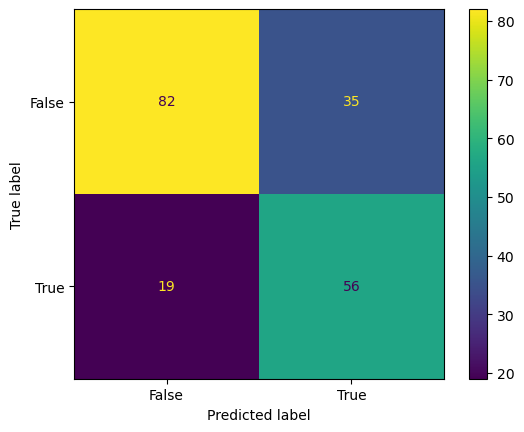

In [56]:
plt.figure(figsize=(5,5))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

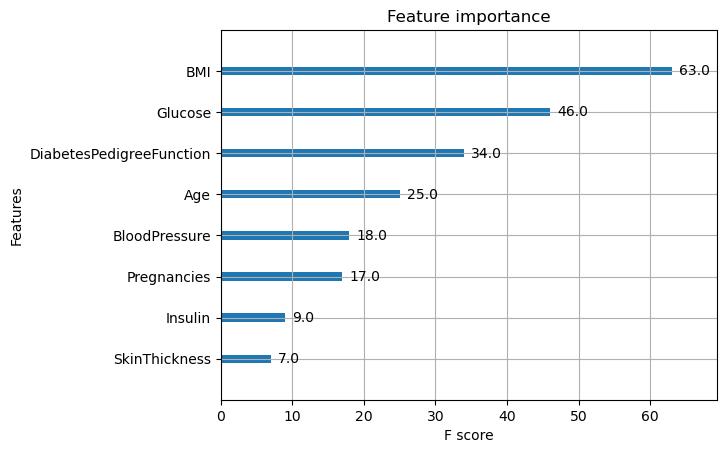

In [57]:
from xgboost import plot_importance
plot_importance(xgb_model)